# Исследование технологического процесса очистки золота

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды на основе данных с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Проверка-расчета-параметра-Recovery" data-toc-modified-id="Проверка-расчета-параметра-Recovery-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета параметра Recovery</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-концентраций-металлов" data-toc-modified-id="Исследование-концентраций-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование концентраций металлов</a></span></li><li><span><a href="#Исследование-гранул-сырья" data-toc-modified-id="Исследование-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование гранул сырья</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-металлов" data-toc-modified-id="Исследование-суммарной-концентрации-металлов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации металлов</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишите-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишите-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишите функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Определение-Recovery-для-чернового-концентрата" data-toc-modified-id="Определение-Recovery-для-чернового-концентрата-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Определение Recovery для чернового концентрата</a></span></li><li><span><a href="#Определение-Recovery-для-финального-концентрата" data-toc-modified-id="Определение-Recovery-для-финального-концентрата-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Определение Recovery для финального концентрата</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Подготовка данных

In [1]:
#импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns


from sklearn.model_selection import cross_val_score 
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, make_scorer

# output formatting
pd.set_option('display.max_rows', 100)

### Общая информация

In [2]:
data_train = pd.read_csv('datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('datasets/gold_recovery_full_new.csv')

In [3]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Убедимся, что все данные были взяты из исходного датасета без потерь. Во-первых, проверим, что при объединении выборок получится столько ж строк, сколько в исходном датасете:

In [5]:
print('Строк в обучающей выборке:', len(data_train))
print('Строк в тестовой выборке', len(data_test))
print('Строк в исходных данных:', len(data_full))
if len(data_train) + len(data_test) == len(data_full):
    print('Количество строк совпадает.')
else:
    print('Количество строк не совпадает.')

Строк в обучающей выборке: 14149
Строк в тестовой выборке 5290
Строк в исходных данных: 19439
Количество строк совпадает.


Чтобы проверить данные на совпадение, выделим из исходных данных строки из выборок по дате, затем посчитаем разность для всех значений и найдем наибольшее из полученных значений. Если результат близок к 0, то можно считать, что данные совпадают.

In [6]:
sliced = data_full.loc[data_full['date'].isin(data_train['date']), data_train.columns].reset_index(drop=True)

round(max([(sliced[col]- data_train[col]).max() for col in data_train.columns[1:]]), 4)

0.0

In [7]:
sliced = data_full.loc[data_full['date'].isin(data_test['date']), data_test.columns].reset_index(drop=True)

max([(sliced[col]- data_test[col]).max() for col in data_test.columns[1:]])

0.0

Пропуски в данных игнорируются при расчетах. Проверим, что они совпадают:

In [8]:
def merge_check(data, data_full):

    for col in data.columns:
    
        if data[col].isna().sum() > 0:                  
            index = list(data.loc[data[col].isna(), 'date'])
            index_full = list(data_full.loc[data_full[col].isna(), 'date'])
            if set(index).issubset(index_full) == False:
                return 'Не совпадают'
    
    return 'Совпадают'

merge_check(data_train, data_full)

'Совпадают'

In [9]:
merge_check(data_test, data_full)

'Совпадают'

Вывод: данные совпадают.

Замечание: метод equals не подходит, так как присутствует разница из-за погрешностей округления, которую метод воспринимает как разные значения.

### Проверка расчета параметра Recovery

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery.

$$Recovery = \dfrac{C \times \left(F - T\right)}{F \times \left(C - T\right)} \times 100\%$$

где

$C$ — доля золота в концентрате после флотации/очистки,

$F$ — доля золота в сырье/концентрате до флотации/очистки,

$T$ — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Этап флотации:

    C - 'rougher.input.feed_au'
    F - 'rougher.output.concentrate_au'
    T - 'rougher.output.tail_au'

    Recovery - 'rougher.output.recovery'

In [10]:
recovery_rougher = data_train['rougher.output.recovery']

C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

recovery_rougher_calc = C * (F - T) / (F * (C - T)) * 100

mean_absolute_error(recovery_rougher, recovery_rougher_calc).round(2)

0.0

Этап очистки:

    C - 'final.output.concentrate_au'
    F - 'rougher.input.feed_au'
    T - 'final.output.tail_au'

    Recovery - 'final.output.recovery'

In [11]:
recovery_final = data_train['final.output.recovery']

C = data_train['final.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['final.output.tail_au']

recovery_final_calc = C * (F - T) / (F * (C - T)) * 100

mean_absolute_error(recovery_final[recovery_final_calc>0], recovery_final_calc[recovery_final_calc>0]).round(2)

0.0

**Вывод**

Все посчитано верно.

### Анализ признаков
Проанализируем признаки, недоступные в тестовой выборке.

In [12]:
diff_names = set(data_train.columns) - set(data_test.columns)
    
diff_names

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют данные 2 типов: 

- `[этап].output.[название_параметра]` — параметры продукта: концентрата и отвального хвоста после каждого этапа очистки
- `[этап].calculation.[название_параметра]` — расчётные характеристики, получаемые после каждого этапа очистки

Эти данные недоступны на момент моделирования процесса, поэтому они не могут быть использованы для предсказания долей золота в концентратах и хвостах.

### Предобработка данных

Не все столбцы, присутсвующие в обучающих данных, могут быть использованы при обучении. В качестве признаков будут использованы только те столбцы, которые присутствуют в тестовых данных: 

**Флотация**

- *Параметры сырья*
    - `rougher.input.feed_ag`
    - `rougher.input.feed_pb`
    - `rougher.input.feed_rate`
    - `rougher.input.feed_size`
    - `rougher.input.feed_sol`
    - `rougher.input.feed_au`


- *Параметры флотационной установки*
    - `rougher.input.floatbank10_sulfate`
    - `rougher.input.floatbank10_xanthate`
    - `rougher.input.floatbank11_sulfate`
    - `rougher.input.floatbank11_xanthate`
    - `rougher.state.floatbank10_a_air`
    - `rougher.state.floatbank10_a_level`
    - `rougher.state.floatbank10_b_air`
    - `rougher.state.floatbank10_b_level`
    - `rougher.state.floatbank10_c_air`
    - `rougher.state.floatbank10_c_level`
    - `rougher.state.floatbank10_d_air`
    - `rougher.state.floatbank10_d_level`
    - `rougher.state.floatbank10_e_air`
    - `rougher.state.floatbank10_e_level`
    - `rougher.state.floatbank10_f_air`
    - `rougher.state.floatbank10_f_level`


**Первый этап очистки**
- *Параметры входного концентрата*
    - `primary_cleaner.input.sulfate`
    - `primary_cleaner.input.depressant`
    - `primary_cleaner.input.feed_size`
    - `primary_cleaner.input.xanthate`
- *Параметры установки*
    - `primary_cleaner.state.floatbank8_a_air`
    - `primary_cleaner.state.floatbank8_a_level`
    - `primary_cleaner.state.floatbank8_b_air`
    - `primary_cleaner.state.floatbank8_b_level`
    - `primary_cleaner.state.floatbank8_c_air`
    - `primary_cleaner.state.floatbank8_c_level`
    - `primary_cleaner.state.floatbank8_d_air`
    - `primary_cleaner.state.floatbank8_d_level`


**Второй этап очистки**
- *Параметры установки*
    - `secondary_cleaner.state.floatbank2_a_air`
    - `secondary_cleaner.state.floatbank2_a_level`
    - `secondary_cleaner.state.floatbank2_b_air`
    - `secondary_cleaner.state.floatbank2_b_level`
    - `secondary_cleaner.state.floatbank3_a_air`
    - `secondary_cleaner.state.floatbank3_a_level`
    - `secondary_cleaner.state.floatbank3_b_air`
    - `secondary_cleaner.state.floatbank3_b_level`
    - `secondary_cleaner.state.floatbank4_a_air`
    - `secondary_cleaner.state.floatbank4_a_level`
    - `secondary_cleaner.state.floatbank4_b_air`
    - `secondary_cleaner.state.floatbank4_b_level`
    - `secondary_cleaner.state.floatbank5_a_air`
    - `secondary_cleaner.state.floatbank5_a_level`
    - `secondary_cleaner.state.floatbank5_b_air`
    - `secondary_cleaner.state.floatbank5_b_level`
    - `secondary_cleaner.state.floatbank6_a_air`
    - `secondary_cleaner.state.floatbank6_a_level`

Нужно спрогнозировать сразу две величины:
- `rougher.output.recovery` - эффективность обогащения чернового концентрата
- `final.output.recovery` - эффективность обогащения финального концентрата

Это целевые признаки.

Все остальные данные не могут быть использованы при обучении, поэтому нет необходимости проводить для них предобработку.

In [13]:
diff_names.remove('rougher.output.recovery')
diff_names.remove('final.output.recovery')
data_train = data_train.drop(diff_names, axis=1)

In [14]:
# функция для получения основной информации о данных
def get_info(data):
    display(data.head(2))
    print("Shape:", data.shape, '\n')
    print("Количество пропусков в данных:\n", data.isna().sum(), '\n', sep='')
    print("Количество дубликатов:", data.duplicated().sum(), '\n')    

In [15]:
get_info(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


Shape: (5290, 53) 

Количество пропусков в данных:
date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floa

In [16]:
get_info(data_train)

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


Shape: (14149, 55) 

Количество пропусков в данных:
date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         7

В данных присутствуют пропуски. Так как выборки взяты из исходных данных, для удобства мы можем исследовать полные данные на закономерности, а затем использовать их для заполнения.

Соседние по времени параметры часто похожи. Проверим корреляцию между соседними значениями для разных параметров:

In [17]:
for col in data_test.columns[1:]:
    if data_full[col].isna().sum() > 0:
        print(col, round(data_full[col].corr(data_full[col].shift(-1)), 2))

primary_cleaner.input.sulfate 0.95
primary_cleaner.input.depressant 0.97
primary_cleaner.input.xanthate 0.98
primary_cleaner.state.floatbank8_a_air 0.96
primary_cleaner.state.floatbank8_a_level 0.95
primary_cleaner.state.floatbank8_b_air 0.97
primary_cleaner.state.floatbank8_b_level 0.92
primary_cleaner.state.floatbank8_c_air 0.96
primary_cleaner.state.floatbank8_c_level 0.89
primary_cleaner.state.floatbank8_d_air 0.99
primary_cleaner.state.floatbank8_d_level 0.84
rougher.input.feed_pb 0.94
rougher.input.feed_rate 0.86
rougher.input.feed_size 0.87
rougher.input.feed_sol 0.8
rougher.input.floatbank10_sulfate 0.95
rougher.input.floatbank10_xanthate 0.9
rougher.input.floatbank11_sulfate 0.96
rougher.input.floatbank11_xanthate 0.91
rougher.state.floatbank10_a_air 0.98
rougher.state.floatbank10_a_level 0.99
rougher.state.floatbank10_b_air 0.98
rougher.state.floatbank10_b_level 0.99
rougher.state.floatbank10_c_air 0.99
rougher.state.floatbank10_c_level 0.99
rougher.state.floatbank10_e_air 0.

Наименьшая корреляция равна 0.8, а большая часть значений близка к 1. Используем для заполнения пропусков предыдущее значение.

In [18]:
for col in data_test.columns[1:]:
    if data_full[col].isna().sum() > 0:
        data_full[col] = data_full[col].fillna(method='ffill')

Проверим, остались ли пропуски в столбцах:

In [19]:
for col in data_train.columns[1:]:
    if data_full[col].isna().sum() > 0:
        print(col, data_full[col].isna().sum())

Пропусков в исходных данных больше нет. Заполним теперь пропуски в выборках:

In [20]:
filler = data_full[data_full['date'].isin(data_train['date'])].reset_index(drop=True)
data_train = data_train.fillna(filler)

filler =  data_full[data_full['date'].isin(data_test['date'])].reset_index(drop=True)
data_test = data_test.fillna(data_full)

del filler

Для тестовой выборки необходимо восстановить целевой признак для будущей проверки модели:

In [21]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

После обработки датасеты выглядят следующим образом:

In [22]:
get_info(data_train)

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


Shape: (14149, 55) 

Количество пропусков в данных:
date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au               

In [23]:
get_info(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432


Shape: (5290, 55) 

Количество пропусков в данных:
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate    

### Вывод

На данном этапе были выполнены следующие шаги:
- Проверено, что эффективность обогащения рассчитана правильно.
- Проанализированы признаки, недоступные в тестовой выборке. 
- Проведена предобработка данных.

## Анализ данных

### Исследование концентраций металлов

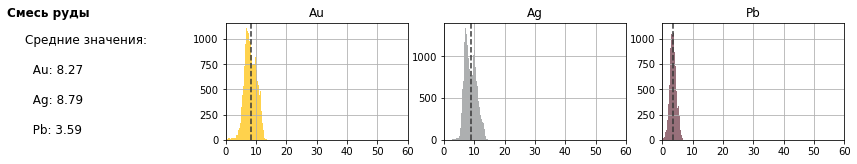

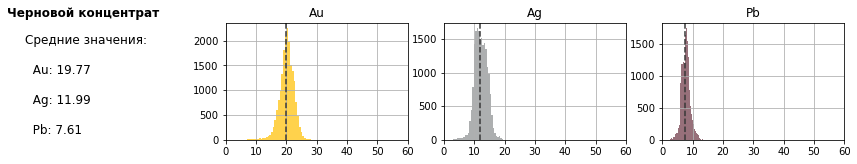

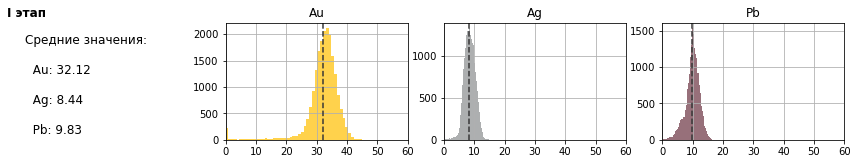

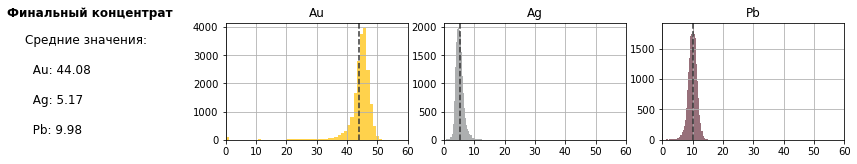

In [24]:
def plot_concentrate_hist(data, mask, name, colors):
    
    fig, axes = plt.subplot_mosaic([['Average Values', 'au', 'ag', 'pb']])
    fig.set_figheight(2.15)
    fig.set_figwidth(15)
    
    
    avg = {}
    avg['au'] = round(data[mask+'au'].mean(), 2)
    avg['ag'] = round(data[mask+'ag'].mean(), 2)
    avg['pb'] = round(data[mask+'pb'].mean(), 2)
    
    s = f'{name}'
    axes['Average Values'].text(0, 1.05, s, fontsize=12, weight='bold')
    s = f'Средние значения:\n\n  Au: {avg["au"]}\n\n  Ag: {avg["ag"]}\n\n  Pb: {avg["pb"]}'
    axes['Average Values'].text(0.1, 0.05, s, fontsize=12)
    
    axes['Average Values'].axis('off')

    for key in ['au', 'ag', 'pb']:
        data[mask+key].hist(bins=50, ax=axes[key], color=colors[key], grid=True)
        axes[key].set_title(key.capitalize())
        axes[key].set_xlim(0, 60)
        axes[key].axvline(x=avg[key], color='#373737', ls='--')
        

        
columns = ['rougher.input.feed_',
       'rougher.output.concentrate_',
       'primary_cleaner.output.concentrate_',
       'final.output.concentrate_']


colors = {'au':'#FFD24C', 'ag':'#adafb0', 'pb': '#97707A'}

titles = ['Смесь руды', 'Черновой концентрат', 'I этап', 'Финальный концентрат']


for i in range(len(columns)):
    plot_concentrate_hist(data_full, columns[i], titles[i], colors)

**Вывод:**
- Концентрация золота увеличивается на каждом этапе очистки. Средняя итоговая концентрация равна 44.8.
- Концентрация серебра незначительно меняется по мере прохождения этапов очистки. Наибольшая средняя концентрация в черновом концентрате - 11.99.  
- Концентрация свинца сильно возрастает на этапе флотации и продолжает возрастать далее, до 9.98.

### Исследование гранул сырья

Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

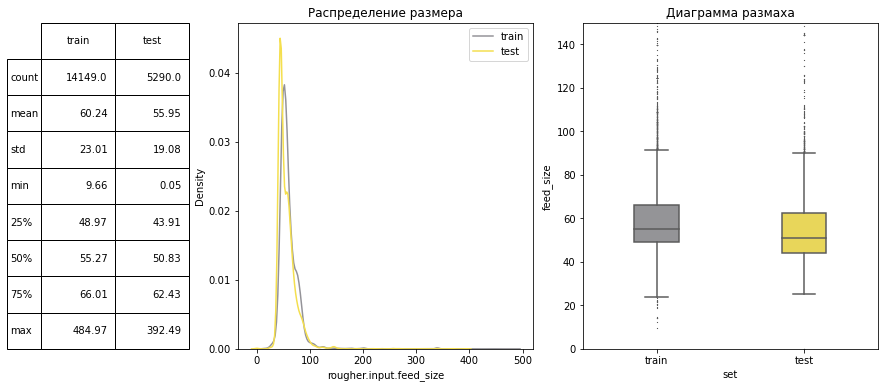

In [25]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 2, 2]})
fig.set_figheight(6)
fig.set_figwidth(15)

#summary table
summary = pd.DataFrame(data=[data_train['rougher.input.feed_size'].describe(), data_test['rougher.input.feed_size'].describe()],
             index = ['train', 'test']
            ).transpose()

bbox = [0, 0, 1, 1]
ax[0].axis('off')
ax[0].table(cellText=summary.values.round(2), rowLabels=summary.index, bbox=bbox, colLabels=summary.columns)

# Гистограмма
sns.kdeplot(data_train['rougher.input.feed_size'], 
             color='#949398FF', 
             label='train',
             ax=ax[1]
            )
sns.kdeplot(data_test['rougher.input.feed_size'],
             color='#F4DF4EFF', 
             label='test',
             ax=ax[1]
            )
#data_train['rougher.input.feed_size'].hist(bins=50, color='#949398FF', label='train', ax=ax[1])
#data_test['rougher.input.feed_size'].hist(bins=50, color='#F4DF4EFF', label='test', ax=ax[1])
ax[1].legend()
ax[1].set_title('Распределение размера')

# Диаграмма размаха
df_tr = pd.DataFrame()
df_tr['feed_size'] = data_train['rougher.input.feed_size']
df_tr['set'] = 'train'

df_tst = pd.DataFrame()
df_tst['feed_size']= data_test['rougher.input.feed_size']
df_tst['set'] = 'test'

df = pd.concat([df_tr, df_tst])

sns.boxplot(data=df,
            x='set',
            y='feed_size',            
            palette=['#949398FF', '#FFE743'],
            width=0.3,
            fliersize=0.4,
            ax=ax[2]
           )

ax[2].set_ylim(0, 150)
ax[2].set_title('Диаграмма размаха')

None

Размеры гранул сырья на обучающей и тестовой выборках сопоставимы.

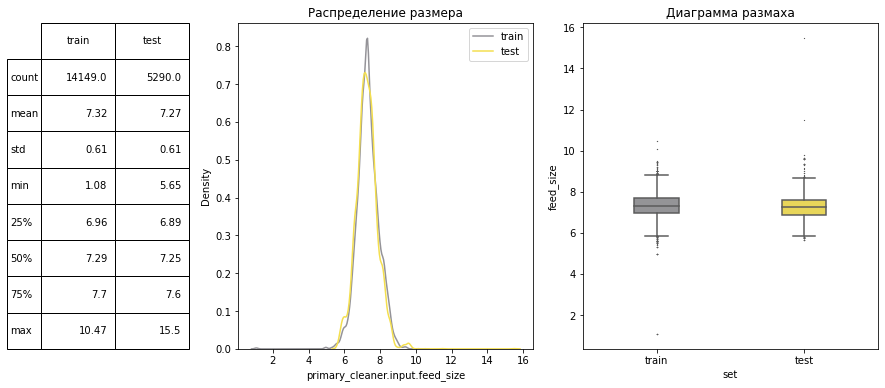

In [26]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 2, 2]})
fig.set_figheight(6)
fig.set_figwidth(15)

#summary table
summary = pd.DataFrame(data=[data_train['primary_cleaner.input.feed_size'].describe(), data_test['primary_cleaner.input.feed_size'].describe()],
             index = ['train', 'test']
            ).transpose()

bbox = [0, 0, 1, 1]
ax[0].axis('off')
ax[0].table(cellText=summary.values.round(2), rowLabels=summary.index, bbox=bbox, colLabels=summary.columns)

# Гистограмма
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], 
             color='#949398FF', 
             label='train',
             ax=ax[1]
            )
sns.kdeplot(data_test['primary_cleaner.input.feed_size'],
             color='#F4DF4EFF', 
             label='test',
             ax=ax[1]
            )

ax[1].legend()
ax[1].set_title('Распределение размера')

# Диаграмма размаха
df_tr = pd.DataFrame()
df_tr['feed_size'] = data_train['primary_cleaner.input.feed_size']
df_tr['set'] = 'train'

df_tst = pd.DataFrame()
df_tst['feed_size']= data_test['primary_cleaner.input.feed_size']
df_tst['set'] = 'test'

df = pd.concat([df_tr, df_tst])

sns.boxplot(data=df,
            x='set',
            y='feed_size',            
            palette=['#949398FF', '#FFE743'],
            width=0.3,
            fliersize=0.4,
            ax=ax[2]
           )

ax[2].set_title('Диаграмма размаха')

None

Размеры гранул чернового концентрата на обучающей и тестовой выборках сопоставимы.

###  Исследование суммарной концентрации металлов

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

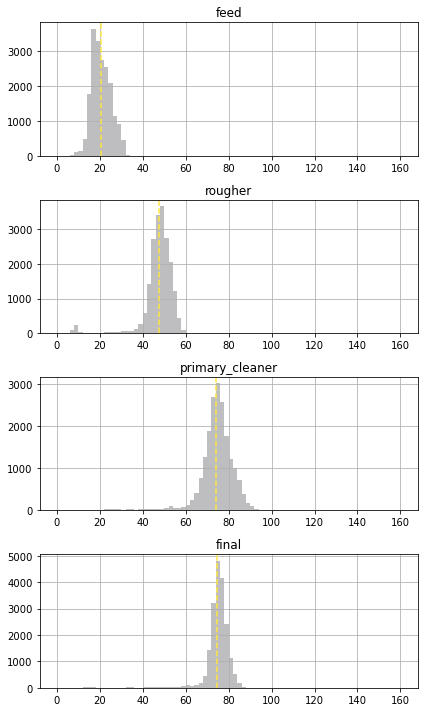

In [27]:
concentrate = pd.DataFrame()
concentrate['feed'] = data_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']].sum(axis=1)

for stage in ['rougher', 'primary_cleaner', 'final']:    
    concentrate[stage] = 0
    for param in ['.output.concentrate_', '.output.tail_']:
        for stuff in ['ag', 'pb', 'au']:
            concentrate[stage] += data_full[stage + param + stuff]


fig, ax = plt.subplots(4, 1, figsize=(6, 10))
i = 0
for col in concentrate.columns:
    concentrate[col].hist(bins=80, alpha=0.6, range=(0,160), ax=ax[i], color='#949398FF')
    ax[i].axvline(x=concentrate[col].mean(), color='#FFE743', ls='--')
    ax[i].set_title(col)
    i += 1
fig.tight_layout()    
None

In [28]:
concentrate.mean()

feed               20.646120
rougher            47.423871
primary_cleaner    73.904607
final              74.681839
dtype: float64

Общая концентрация веществ растет по мере прохождения этапов очистки. На основе предыдущих шагов можно сделать вывод, что это происходит исключительно из-за увеличения концентрации золота.

## Модель

### Напишите функцию для вычисления итоговой sMAPE.

Для решения задачи используется метрику sMAPE:

$$sMAPE = \dfrac{1}{N}\sum_{i=1}^{N} \dfrac{|y_i - \hat y_i|}{\left( |y_i| + |\hat y_i|\right) / 2} \times 100\%$$

где

$y_i$ - значение целевого признака для объекта с порядковым номером i,

$\hat{y_i}$ - значение предсказания для объекта с порядковым номером i,
    
$N$ - количество объектов в выборке.

In [29]:
def smape(t, p):
    metric_i = abs(t - p) / (abs(t) + abs(p)) * 2
    return 1/len(t) * metric_i.sum() * 100

Нужно спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата `rougher.output.recovery`
- эффективность обогащения финального концентрата `final.output.recovery`

Итоговая метрика складывается из двух величин:

$$Итоговое\ sMAPE = 25\% \times sMAPE\left(rougher\right) + 75\% \times sMAPE\left(final\right)$$

In [30]:
def final_smape(smape_r, smape_f):
    return 0.25 * smape_r + 0.75 * smape_f

### Подготовка признаков

При обучении необходимо определить эфективность обогащения дважды: после флотации и в результате всего процесса. Концентрация золота после флотации определяется исходным сырьем и параметрами этого этапа, поэтому необходимо использовать только признаки `rougher.[тип_параметра].[название_параметра]`. На значение итоговой концентрации влияет состояние на каждом этапе, поэтому должны быть использованы все доступные признаки.

Близкие по времени значения схожи, поэтому для улучшения обучения данные должны быть перемешаны.

In [31]:
#rougher train
drop_names = [name for name in data_train.columns if name.find('rougher')] + ['rougher.output.recovery']
feat_tr_r = data_train.drop(drop_names, axis=1)
trgt_tr_r = data_train['rougher.output.recovery']
feat_tr_r, trgt_tr_r = shuffle(
        feat_tr_r, trgt_tr_r, random_state=12345)


#rougher test
drop_names = [name for name in data_test.columns if name.find('rougher')] + ['rougher.output.recovery']
feat_tst_r = data_test.drop(drop_names, axis=1)
trgt_tst_r = data_test['rougher.output.recovery']


#final train
feat_tr_f = data_train.drop(['rougher.output.recovery','final.output.recovery', 'date'], axis=1)
trgt_tr_f = data_train['final.output.recovery']
feat_tr_f, trgt_tr_f = shuffle(
        feat_tr_f, trgt_tr_f, random_state=12345)

#final test
feat_tst_f = data_test.drop(['rougher.output.recovery','final.output.recovery', 'date'], axis=1)
trgt_tst_f = data_test['final.output.recovery']
None

### Обучение моделей

В качестве моделей рассматриваются 
- Дерево решений
- Случайный лес
- Линейная регрессия

Предсказываются два параметра, для каждого должна быть определена наиболее эффективная модель на основе метрики sMAPE.

In [32]:
# <обучение модели>
def train_model(model, parameters, features, target):
    
    model_search = RandomizedSearchCV(model, parameters, cv=4, 
                                      scoring=make_scorer(smape, greater_is_better=False), 
                                      random_state=12345
                                     )
    model_search.fit(features, target)
    
    return model_search, model_search.best_params_, abs(model_search.best_score_)
    
    
# <красивая печать>
def printer(params, sMAPE):
    
    print('Параметры модели:')
    for key, value in params.items():
        print(f'  {key}: {value}')
    print('\nsMAPE =', sMAPE.round(2))
    

# <красивый график targets vs predictions>
def plot_target_vs_predict(target, predictions):

    plt.scatter(target, target, label='target',  marker=".", lw=0.7, s=1, c='r')
    plt.scatter(target, predictions, label='predict', marker=",", lw=0, s=1, alpha=0.2)
    plt.xlabel('target')
    plt.legend()
    None

#### Определение Recovery для чернового концентрата

**Модель дерева решений**

In [33]:
tree_model = DecisionTreeRegressor(random_state=12345)    
parameters = {'max_depth': list(range(2, 20))}

tree_model, tree_params, tree_score = train_model(tree_model, parameters, feat_tr_r, trgt_tr_r)

In [34]:
printer(tree_params, tree_score)

Параметры модели:
  max_depth: 16

sMAPE = 8.6


**Модель случайного леса**

In [35]:
forest_model = RandomForestRegressor(random_state=12345)    
parameters = {'max_depth': list(range(2, 50)),
              'n_estimators': list(range(1, 50))
             }

forest_model, forest_params, forest_score = train_model(forest_model, parameters, feat_tr_r, trgt_tr_r)

In [36]:
printer(forest_params, forest_score)

Параметры модели:
  n_estimators: 47
  max_depth: 45

sMAPE = 8.23


**Модель линейной регрессии**

In [37]:
lr_model = LinearRegression()
lr_score = abs(cross_val_score(lr_model, feat_tr_f, trgt_tr_r, scoring=make_scorer(smape, greater_is_better=False)).mean())
print('sMAPE =', lr_score.round(2))

sMAPE = 10.13


In [38]:
lr_model = LinearRegression()
lr_model.fit(feat_tr_f, trgt_tr_r)
None

**Итоговая модель**

Сравним метрики всех трех моделей:

In [39]:
print('Дерево решений: sMAPE =', tree_score.round(2))
print('Случайный лес: sMAPE =', forest_score.round(2))
print('Линейная регрессия: sMAPE =', lr_score.round(2))

Дерево решений: sMAPE = 8.6
Случайный лес: sMAPE = 8.23
Линейная регрессия: sMAPE = 10.13


Лучшее значение sMAPE у модели случайного леса, поэтому она будет проверена на тестовой выборке.

In [40]:
rougher_model = forest_model
rougher_model.fit(feat_tr_r, trgt_tr_r)
None

Визуально оценим качество модели. Построим график, отображающий предсказаное значение относительно действительного на обучающей выборке.

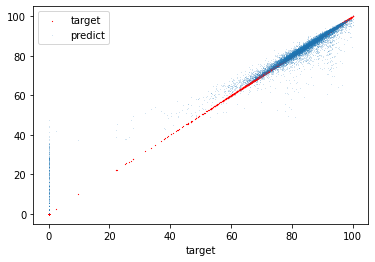

In [41]:
plot_target_vs_predict(trgt_tr_r, rougher_model.predict(feat_tr_r))

Модель неплохо справляется с данными, для которых Recovery находится в пределах ~70-100. Данных с более низкими порогами меньше, и они предсказываются хуже.

#### Определение Recovery для финального концентрата

**Модель дерева решений**

In [42]:
tree_model = DecisionTreeRegressor(random_state=12345)    
parameters = {'max_depth': list(range(2, 20))}

tree_model, tree_params, tree_score = train_model(tree_model, parameters, feat_tr_f, trgt_tr_f)

In [43]:
printer(tree_params, tree_score)

Параметры модели:
  max_depth: 10

sMAPE = 8.73


**Модель случайного леса**

In [44]:
forest_model = RandomForestRegressor(random_state=12345)    
parameters = {'max_depth': list(range(2, 20)),
              'n_estimators': list(range(2, 30))
             }

forest_model, forest_params, forest_score = train_model(forest_model, parameters, feat_tr_f, trgt_tr_f)

In [45]:
printer(forest_params, forest_score)

Параметры модели:
  n_estimators: 29
  max_depth: 19

sMAPE = 6.98


**Модель линейной регрессии**

In [46]:
lr_model = LinearRegression()
lr_score = abs(cross_val_score(lr_model, feat_tr_f, trgt_tr_r, scoring=make_scorer(smape, greater_is_better=False)).mean())
print('sMAPE =', lr_score.round(2)')

sMAPE = 10.13 😎


**Итоговая модель**

Сравним метрики всех трех моделей:

In [47]:
print('Дерево решений: sMAPE =', tree_score.round(2))
print('Случайный лес: sMAPE =', forest_score.round(2))
print('Линейная регрессия: sMAPE =', lr_score.round(2))

Дерево решений: sMAPE = 8.73
Случайный лес: sMAPE = 6.98
Линейная регрессия: sMAPE = 10.13


Лучшее значение sMAPE у модели случайного леса, поэтому она будет проверена на тестовой выборке.

In [58]:
final_model = forest_model
final_model.fit(feat_tr_f, trgt_tr_f)
None

Визуально оценим качество модели. Построим график, отображающий предсказаное значение относительно действительного на обучающей выборке.

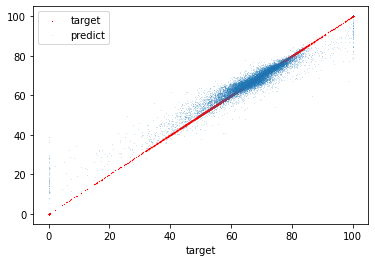

In [59]:
plot_target_vs_predict(trgt_tr_f, final_model.predict(feat_tr_f))

Модель неплохо справляется с данными, для которых Recovery находится в пределах ~60-80. Значения вне этих пределов хуже.

### Тестирование моделей

Проведем тестирование моделей.

In [60]:
pred_r = rougher_model.predict(feat_tst_r)
smape_r = smape(trgt_tst_r, pred_r)
print(smape_r.round(2))

13.88


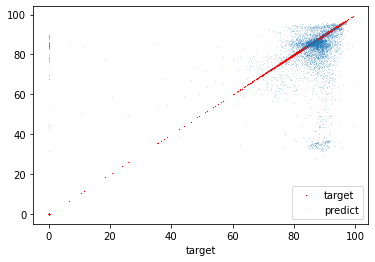

In [61]:
plot_target_vs_predict(trgt_tst_r, rougher_model.predict(feat_tst_r))

График для тестовых данных похож на график для обучающих, но sMAPE выше, что говорит в пользу малой переобученности модели.

In [62]:
pred_f = final_model.predict(feat_tst_f)
smape_f = smape(trgt_tst_f, pred_f)
print(smape_f.round(2))

10.67


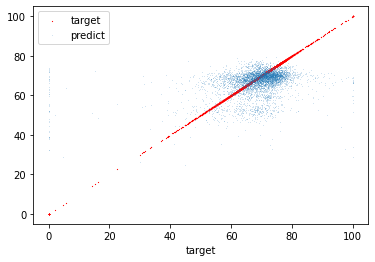

In [63]:
plot_target_vs_predict(trgt_tst_f, final_model.predict(feat_tst_f))

График для тестовых данных похож на график для обучающих, но sMAPE выше, что говорит в пользу малой переобученности модели.

**ИТОГОВЫЙ sMAPE**

In [64]:
final_smape(smape_r, smape_f).round(2)

11.47

### Проверка на адекватность

Сравним выбранные модели с константной. В качестве значения предсказания воспользуемся средним значением:

In [55]:
smape_r_const = smape(trgt_tst_r, trgt_tr_r.mean())
print(smape_r_const.round(2))

10.38


In [56]:
smape_f_const = smape(trgt_tst_f, trgt_tr_f.mean())
print(smape_f_const.round(2))

10.26


In [57]:
final_smape(smape_r_const, smape_f_const).round()

10.0

Рабочие модели показывают значения sMAPE выше, чем простая константная модель. Необходима дальнейшая доработка.

## Выводы

В рамках проекта была выполнена предобработка данных: 
- Проверено, что эффективность обогащения рассчитана правильно
- Проанализированы признаки, недоступные в тестовой выборке
- Заполнены пропуски и убраны излишние данные.

В качестве потенциальных моделей рассмотрены модели решающего дерева, случайного леса и логистической регрессии. Для каждой из них были подобраны гиперпараметры для улучшения качества при помощи кросс-валидации. 

В результате были подобраны 2 модели для предсказывания 2 целевых признаков. Модели были проверены на тестовой выборке. Итоговое значение sMAPE составляет 10.